拿RSI 的t+3去回归 rsi14和二次平滑的rsi全都为全样本，没有加上50-100为限这个条件

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [30]:
df = pd.read_csv("df_regression_short.csv")

In [31]:
df[:5]

,Unnamed: 0,Date,reverse_direction,DayHigh,highest_time,DayLow,lowest_time,DayOpen,YesterdayRange,DownPinBar,TopType,DownPregnantType,DownSwallowType,RSI,LastRSI,TopDivergence,RSIShortgodown
0,0,2018-04-16,down,24829.570,2018-04-17 12:00:00,24485.169,2018-04-16 13:30:00,24525.070,0.000,0.000000,0,0,0,75.400819,70.621625,1,1
1,1,2018-04-17,up,24860.169,2018-04-17 15:00:00,24724.970,2018-04-17 22:00:00,24824.069,344.401,3.929133,0,0,0,62.882012,63.443803,1,1
2,2,2018-04-18,up,24827.669,2018-04-18 13:30:00,24656.069,2018-04-19 13:00:00,24793.569,135.199,0.000000,0,0,0,50.110022,45.113751,0,0
3,3,2018-04-19,up,24757.670,2018-04-19 14:30:00,24550.670,2018-04-19 17:30:00,24693.069,171.600,0.000000,1,0,0,47.676257,48.912071,1,0
4,4,2018-04-20,up,24679.170,2018-04-20 13:30:00,24373.670,2018-04-20 19:15:00,24658.570,207.000,0.000000,0,1,0,41.321523,55.135159,0,0


In [32]:
ratio = [(df.DayHigh[i] - df.DayOpen[i])/df.YesterdayRange[i] if (df.reverse_direction[i] == 'up') else (df.DayHigh[i] - df.DayLow[i])/df.YesterdayRange[i] for i in range(len(df))]
ratio[:10]

<ipython-input-32-af19fc8092d1>:1: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = [(df.DayHigh[i] - df.DayOpen[i])/df.YesterdayRange[i] if (df.reverse_direction[i] == 'up') else (df.DayHigh[i] - df.DayLow[i])/df.YesterdayRange[i] for i in range(len(df))]


[inf,
 0.10481967241674203,
 0.2522208004497024,
 0.3764627039626999,
 0.09951690821255335,
 1.0127692307692362,
 0.0358757728643362,
 0.49272010688043166,
 0.7578612856255749,
 0.9906976744186099]

In [33]:
df['Ratio'] = ratio

In [34]:
df[:5]

,Unnamed: 0,Date,reverse_direction,DayHigh,highest_time,DayLow,lowest_time,DayOpen,YesterdayRange,DownPinBar,TopType,DownPregnantType,DownSwallowType,RSI,LastRSI,TopDivergence,RSIShortgodown,Ratio
0,0,2018-04-16,down,24829.570,2018-04-17 12:00:00,24485.169,2018-04-16 13:30:00,24525.070,0.000,0.000000,0,0,0,75.400819,70.621625,1,1,inf
1,1,2018-04-17,up,24860.169,2018-04-17 15:00:00,24724.970,2018-04-17 22:00:00,24824.069,344.401,3.929133,0,0,0,62.882012,63.443803,1,1,0.104820
2,2,2018-04-18,up,24827.669,2018-04-18 13:30:00,24656.069,2018-04-19 13:00:00,24793.569,135.199,0.000000,0,0,0,50.110022,45.113751,0,0,0.252221
3,3,2018-04-19,up,24757.670,2018-04-19 14:30:00,24550.670,2018-04-19 17:30:00,24693.069,171.600,0.000000,1,0,0,47.676257,48.912071,1,0,0.376463
4,4,2018-04-20,up,24679.170,2018-04-20 13:30:00,24373.670,2018-04-20 19:15:00,24658.570,207.000,0.000000,0,1,0,41.321523,55.135159,0,0,0.099517


In [40]:
#判断是否今日RSI小于昨日RSI
rsi_down = [1 if df.LastRSI[i] > df.RSI[i] else 0 for i in range(len(df))]

In [41]:
df['rsi_down'] = rsi_down

In [45]:
df['Y'] = 1

In [46]:
df[:5]

,Unnamed: 0,Date,reverse_direction,DayHigh,highest_time,DayLow,lowest_time,DayOpen,YesterdayRange,DownPinBar,TopType,DownPregnantType,DownSwallowType,RSI,LastRSI,TopDivergence,RSIShortgodown,Ratio,rsi_down,Y
0,0,2018-04-16,down,24829.570,2018-04-17 12:00:00,24485.169,2018-04-16 13:30:00,24525.070,0.000,0.000000,0,0,0,75.400819,70.621625,1,1,inf,0,1
1,1,2018-04-17,up,24860.169,2018-04-17 15:00:00,24724.970,2018-04-17 22:00:00,24824.069,344.401,3.929133,0,0,0,62.882012,63.443803,1,1,0.104820,1,1
2,2,2018-04-18,up,24827.669,2018-04-18 13:30:00,24656.069,2018-04-19 13:00:00,24793.569,135.199,0.000000,0,0,0,50.110022,45.113751,0,0,0.252221,0,1
3,3,2018-04-19,up,24757.670,2018-04-19 14:30:00,24550.670,2018-04-19 17:30:00,24693.069,171.600,0.000000,1,0,0,47.676257,48.912071,1,0,0.376463,1,1
4,4,2018-04-20,up,24679.170,2018-04-20 13:30:00,24373.670,2018-04-20 19:15:00,24658.570,207.000,0.000000,0,1,0,41.321523,55.135159,0,0,0.099517,1,1


In [50]:
df['rsiIdx'] = df.RSI * df.rsi_down

In [51]:
df_regression = df[['Y','Ratio','DownPinBar','TopType','DownPregnantType','DownSwallowType','rsiIdx','TopDivergence','RSIShortgodown']]

In [63]:
df_regression = df_regression[1:]

In [81]:
df_regression

,Y,Ratio,DownPinBar,TopType,DownPregnantType,DownSwallowType,rsiIdx,TopDivergence,RSIShortgodown
1,1,0.104820,3.929133,0,0,0,62.882012,1,1
2,1,0.252221,0.000000,0,0,0,0.000000,0,0
3,1,0.376463,0.000000,1,0,0,47.676257,1,0
4,1,0.099517,0.000000,0,1,0,41.321523,0,0
5,1,1.012769,0.000000,0,0,0,0.000000,1,1
...,...,...,...,...,...,...,...,...,...
674,1,1.838707,0.000000,0,0,0,0.000000,1,0
675,1,0.097659,0.000000,0,0,0,0.000000,0,1
676,1,1.304802,0.000000,1,0,0,0.000000,0,1
677,1,0.124187,0.000000,0,0,0,50.252545,1,0


In [55]:

#y = df_regression.iloc[:,0] # 因变量为第 2 列数据
#x = df_regression.iloc[:,1] # 自变量为第 3 列数据
#
## 线性拟合，可以返回斜率，截距，r 值，p 值，标准误差
#slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
#
#print(slope)# 输出斜率
#print(intercept) # 输出截距
#print(r_value**2) # 输出 r^2

nan
nan
nan


D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


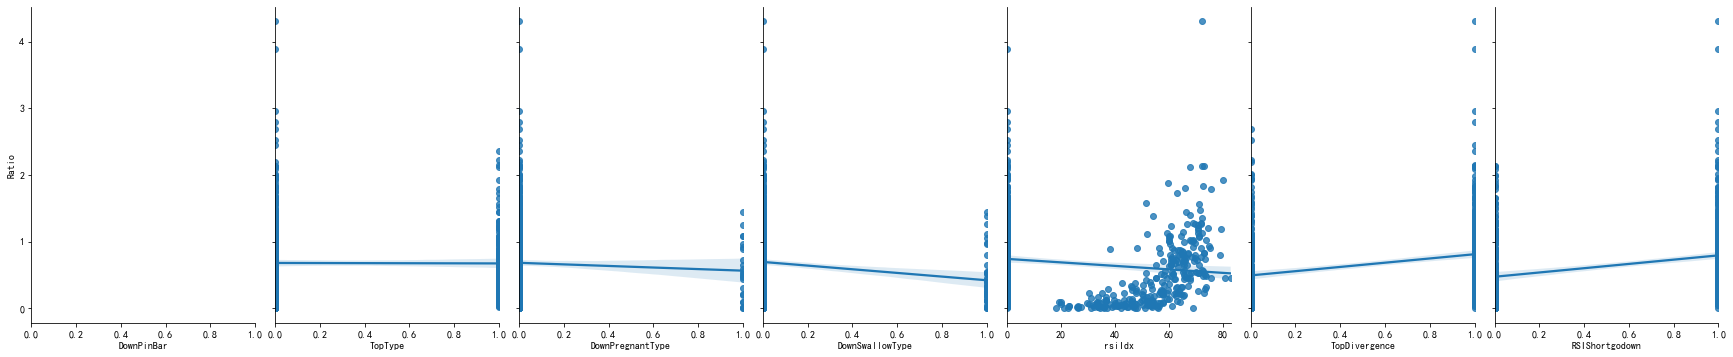

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl   #显示中文 
mpl.rcParams['font.sans-serif'] = ['SimHei']  #配置显示中文，否则乱码
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号，如果是plt画图，则将mlp换成plt
sns.pairplot(df_regression, x_vars=['DownPinBar','TopType','DownPregnantType','DownSwallowType','rsiIdx','TopDivergence','RSIShortgodown'], y_vars='Ratio',kind="reg", height=5, aspect=0.7)
plt.show()#注意必须加上这一句，否则无法显示。
from sklearn.model_selection import train_test_split #这里是引用了交叉验证
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [73]:
#多元线性回归代码
def mul_lr():   #续前面代码
    print('df_regression.head(10)=\n{}'.format(df_regression.head(10)))
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    X=df_regression.loc[:,('DownPinBar','TopType','DownPregnantType','DownSwallowType','rsiIdx','TopDivergence','RSIShortgodown')]
    y=df_regression.loc[:,'Ratio']
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
    feature_cols = ['DownPinBar','TopType','DownPregnantType','DownSwallowType','rsiIdx','TopDivergence','RSIShortgodown']
    B=list(zip(feature_cols,linreg.coef_))
    print(B)
    y_pred = linreg.predict(X_test)
    print (y_pred) #10个变量的预测结果

In [74]:
mul_lr()

df_regression.head(10)=
    Y     Ratio  DownPinBar  TopType  DownPregnantType  DownSwallowType  \
1   1  0.104820    3.929133        0                 0                0   
2   1  0.252221    0.000000        0                 0                0   
3   1  0.376463    0.000000        1                 0                0   
4   1  0.099517    0.000000        0                 1                0   
5   1  1.012769    0.000000        0                 0                0   
6   1  0.035876    0.000000        0                 0                0   
7   1  0.492720    0.000000        1                 0                0   
8   1  0.757861    0.000000        0                 0                0   
9   1  0.990698    0.000000        0                 0                0   
10  1  0.260379    0.000000        0                 0                0   

       rsiIdx  TopDivergence  RSIShortgodown  
1   62.882012              1               1  
2    0.000000              0               0  
3   47.67

In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [7]:
df_all_regression = pd.read_csv('df_all_regression.csv')
df_all_regression[:3]

,Unnamed: 0,GMT,Open,High,Low,Close,Volume,RSI,UpPinBar,DownPinBar,...,RSIShortgoup,OpenTime,BottomDivergence,TopDivergence,Y,Numerator,YesterdayRange,Ratio,short_regression,long_regression
0,0,2018/4/17 15:00,24832.669,24860.169,24825.670,24830.670,7.726080e+06,62.882012,0.0,3.929133,...,0,2018/4/17 13:30,0,1,-1,36.100,344.401,0.104820,1,0
1,1,2018/4/19 14:30,24725.170,24757.670,24708.669,24719.669,1.110114e+07,47.676257,0.0,0.000000,...,0,2018/4/19 13:30,0,1,-1,64.601,171.600,0.376463,1,0
2,2,2018/4/19 19:30,24601.670,24719.669,24592.170,24691.170,9.970280e+06,57.630257,0.0,0.000000,...,0,2018/4/19 13:30,0,0,-1,207.000,171.600,1.206294,1,0


https://zhuanlan.zhihu.com/p/32600544

In [48]:
#logistic regression代码


# 指定作为训练变量的列，不含目标列`admit`
#train_cols = df_all_regression.columns[1:]]
train_cols = df_all_regression[['RSI','DownPinBar','TopType','DownPregnantType','DownSwallowType','RSIShortgodown','TopDivergence','Ratio']]
#train_cols = df_all_regression[['RSI','UpPinBar','BottomType','UpPregnantType','UpSwallowType','RSIShortgoup','BottomDivergence','Ratio']]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
 
#logit = sm.Logit(df_all_regression['Y'], df_all_regression[train_cols])
logit = sm.Logit(df_all_regression['short_regression'], train_cols,maxiter = 50)
#sm.OLS(data.endog, data.exog).fit()
# 拟合模型
result = logit.fit()

         Current function value: 0.370508
         Iterations: 35


D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
result.conf_int()

,0,1
RSI,-0.018694,-0.011454
DownPinBar,0.615506,1.117232
TopType,-501.382536,536.428085
DownPregnantType,0.592338,1.555897
DownSwallowType,-0.687193,0.346729
RSIShortgodown,-2.990126,-2.443231
TopDivergence,4.060904,6.401974
Ratio,-2.279739,-1.578666


In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       short_regression   No. Observations:                 2869
Model:                          Logit   Df Residuals:                     2861
Method:                           MLE   Df Model:                            7
Date:                Tue, 22 Dec 2020   Pseudo R-squ.:                  0.4653
Time:                        23:14:26   Log-Likelihood:                -1063.0
converged:                      False   LL-Null:                       -1988.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
RSI                 -0.0151      0.002     -8.161      0.000      -0.019      -0.011
DownPinBar           0.8664      0.128      6.769      0.000       0.616       1.117
TopType             17.5228    264.752      0.066      0.947    -501.383     536.428
DownPregnantType     1.0741      0.246      4.370      0.000       0.592       1.556
DownSwallowType     -0.1702      0.264     -0.645      0.519      -0.687       0.347
RSIShortgodown      -2.7167      0.140    -19.472      0.000      -2.990      -2.443
TopDivergence        5.2314      0.597      8.760      0.000       4.061       6.402
Ratio               -1.9292      0.179    -10.787      0.000      -2.280      -1.579
====================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
help(logit.fit())

         Current function value: 0.314938
         Iterations: 35
Help on BinaryResultsWrapper in module statsmodels.discrete.discrete_model object:

class BinaryResultsWrapper(statsmodels.regression.linear_model.RegressionResultsWrapper)
 |  BinaryResultsWrapper(results)
 |  
 |  Class which wraps a statsmodels estimation Results class and steps in to
 |  reattach metadata to results (if available)
 |  
 |  Method resolution order:
 |      BinaryResultsWrapper
 |      statsmodels.regression.linear_model.RegressionResultsWrapper
 |      statsmodels.base.wrapper.ResultsWrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  conf_int(self, alpha=0.05, cols=None)
 |      conf_int(self, alpha=0.05, cols=None)
 |      
 |      Construct confidence interval for the fitted parameters.
 |      
 |      Parameters
 |      ----------
 |      alpha : float, optional
 |          The significance level for the confidence interval. The default
 |          `alpha` = .05 returns a 95% 

D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
result

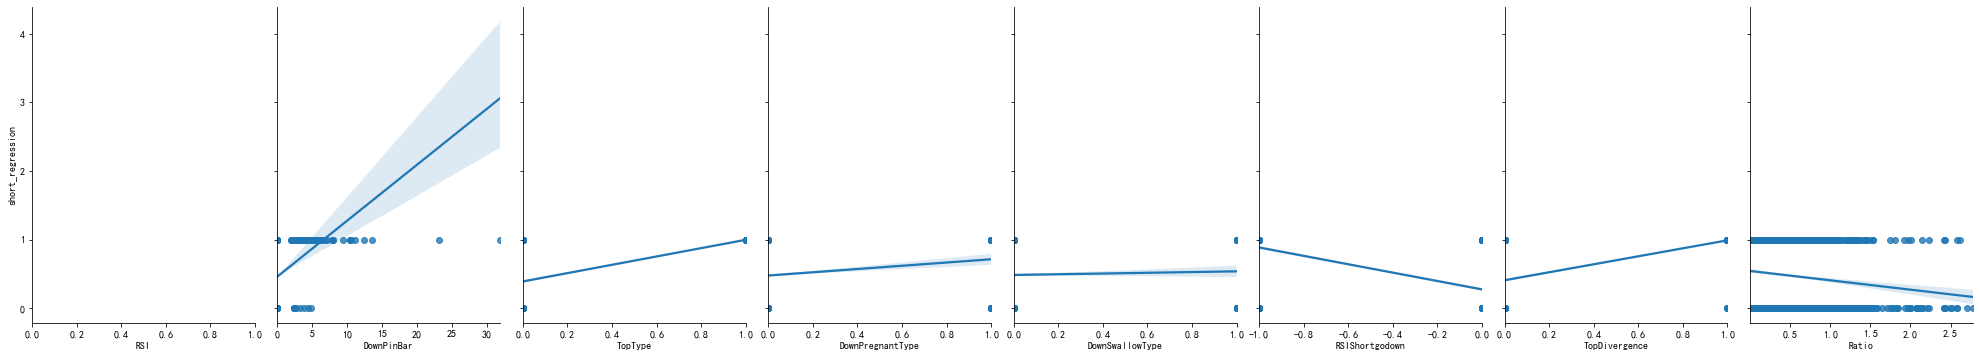

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl   #显示中文 
mpl.rcParams['font.sans-serif'] = ['SimHei']  #配置显示中文，否则乱码
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号，如果是plt画图，则将mlp换成plt
sns.pairplot(df_all_regression, x_vars=['RSI','DownPinBar','TopType','DownPregnantType','DownSwallowType','RSIShortgodown','TopDivergence','Ratio'], y_vars='short_regression',kind="reg", height=5, aspect=0.7)
plt.show()#注意必须加上这一句，否则无法显示。
from sklearn.model_selection import train_test_split #这里是引用了交叉验证
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#多元线性回归代码
def mul_lr():   #续前面代码
    print('df_all_regression.head(10)=\n{}'.format(df_all_regression.head(10)))
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    #X=df_regression.loc[:,('DownPinBar','TopType','DownPregnantType','DownSwallowType','rsiIdx','TopDivergence','RSIShortgodown')]
    #y=df_regression.loc[:,'Ratio']
    X_train,X_test, y_train, y_test = train_test_split(train_cols,df_all_regression['short_regression'],test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
    feature_cols = ['RSI','DownPinBar','TopType','DownPregnantType','DownSwallowType','RSIShortgodown','TopDivergence','Ratio']
    B=list(zip(feature_cols,linreg.coef_))
    print(B)
    y_pred = linreg.predict(X_test)
    print (y_pred) #10个变量的预测结果

In [33]:
mul_lr()

df_all_regression.head(10)=
   Unnamed: 0              GMT       Open       High        Low      Close  \
0           0  2018/4/17 15:00  24832.669  24860.169  24825.670  24830.670   
1           1  2018/4/19 14:30  24725.170  24757.670  24708.669  24719.669   
2           2  2018/4/19 19:30  24601.670  24719.669  24592.170  24691.170   
3           3  2018/4/20 11:00  24675.570  24695.070  24673.069  24675.570   
4           5  2018/4/23 13:30  24512.570  24532.670  24486.669  24490.669   
5           6  2018/4/24 11:30  24582.570  24636.070  24579.069  24609.570   
6           7  2018/4/24 19:15  24005.170  24033.170  23967.670  23980.670   
7           8   2018/4/25 1:15  24063.470  24070.969  24051.969  24053.470   
8           9  2018/4/25 13:30  24056.069  24084.670  23824.669  23839.670   
9          10  2018/4/25 15:00  23995.669  24030.670  23978.670  24003.169   

         Volume        RSI  UpPinBar  DownPinBar  ...  RSIShortgoup  \
0  7.726080e+06  62.882012       0.0    3.

In [36]:
#import scipy.stats as st
#slope, intercept, r_value, p_value, std_err = st.linregress(train_cols, df_all_regression['short_regression'])
#
#print(slope)# 输出斜率
#print(intercept) # 输出截距
#print(r_value**2) # 输出 r^2

In [21]:
from sklearn import preprocessing

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()

In [23]:
X_train_minmax = min_max_scaler.fit_transform(train_cols)

In [24]:
X_train_minmax

array([[0.65442852, 0.12290709, 0.        , ..., 0.        , 1.        ,
        0.03763422],
       [0.4731138 , 0.        , 1.        , ..., 0.        , 1.        ,
        0.13542662],
       [0.59180615, 0.        , 0.        , ..., 1.        , 0.        ,
        0.43416854],
       ...,
       [0.40713743, 0.        , 0.        , ..., 0.        , 0.        ,
        0.06474547],
       [0.37033892, 0.        , 0.        , ..., 0.        , 0.        ,
        0.04745484],
       [0.33299709, 0.        , 0.        , ..., 1.        , 0.        ,
        0.17195158]])

In [25]:
logit = sm.Logit(df_all_regression['short_regression'], X_train_minmax)
result = logit.fit()
result

         Current function value: 0.314938
         Iterations: 35


D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
